In [1]:
# Sources used
# https://www.kaggle.com/sid321axn/step-wise-approach-cnn-model-77-0344-accuracy?fbclid=IwAR2JWtc6_nC3PZwfg5THA1qjTx1qaLc6NllbXIAftRkZQu_AnQ6VMgaDsIs

In [73]:
# import libraries
import os
import numpy as np
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib.pyplot as pl
from PIL import Image
from sklearn.model_selection import train_test_split

In [3]:
# get working directory
cwd = os.getcwd()
print(cwd)

C:\Users\Billy\Documents\CSC8635 - Machine Learning with Project\Machine-Learning-Extended-Technical-Project\mletp\src


In [56]:
# change working directory to import data
os.chdir(r"C:\Users\Billy\Documents\CSC8635 - Machine Learning with Project\Machine-Learning-Extended-Technical-Project\mletp\data")

In [5]:
metadata_df = pd.read_csv("HAM10000_metadata.csv")
hmnist_8_8_L = pd.read_csv("hmnist_8_8_L.csv")
hmnist_8_8_RGB = pd.read_csv("hmnist_8_8_RGB.csv")
hmnist_28_28_L = pd.read_csv("HAM10000_metadata.csv")
hmnist_28_28_RGB = pd.read_csv("HAM10000_metadata.csv")

In [57]:
# dictionary for image paths
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join('*', '*.jpg'))}

In [59]:
# change working directory back
os.chdir(r"C:\Users\Billy\Documents\CSC8635 - Machine Learning with Project\Machine-Learning-Extended-Technical-Project\mletp\src")

In [60]:
# dictionary to rename cell types for readability
lesion_type_dict = {
    'nv': 'Melanocytic Nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign Keratosis-like Lesions ',
    'bcc': 'Basal Cell Carcinoma',
    'akiec': 'Bowens Disease',
    'vasc': 'Vascular Lesions',
    'df': 'Dermatofibroma'
}

In [61]:
# add column for path of image
metadata_df['path'] = metadata_df['image_id'].map(imageid_path_dict.get)
# add column for cell types, for readability
metadata_df['cell_type'] = metadata_df['dx'].map(lesion_type_dict.get)

Exploratory Data Analysis and Data Cleaning

In order to gather an understanding of the data, it was important to run some exploratory data analysis and see things such as the structure of the data and what types the data are stored as.

In [68]:
# print first 5 values of dataframe
print(metadata_df.head(5))

     lesion_id      image_id   dx dx_type   age   sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear   

                                      path                       cell_type  \
0  HAM10000_images_part_1\ISIC_0027419.jpg  Benign Keratosis-like Lesions    
1  HAM10000_images_part_1\ISIC_0025030.jpg  Benign Keratosis-like Lesions    
2  HAM10000_images_part_1\ISIC_0026769.jpg  Benign Keratosis-like Lesions    
3  HAM10000_images_part_1\ISIC_0025661.jpg  Benign Keratosis-like Lesions    
4  HAM10000_images_part_2\ISIC_0031633.jpg  Benign Keratosis-like Lesions    

                                               image  cell_type_id  
0  [[[192, 154, 195], [193, 155, 196], [1

In [64]:
# print first 5 values of dataframe
print(metadata_df.tail(5))

         lesion_id      image_id     dx dx_type   age     sex localization  \
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen   
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen   
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen   
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face   
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back   

                                          path       cell_type  \
10010  HAM10000_images_part_2\ISIC_0033084.jpg  Bowens Disease   
10011  HAM10000_images_part_2\ISIC_0033550.jpg  Bowens Disease   
10012  HAM10000_images_part_2\ISIC_0033536.jpg  Bowens Disease   
10013  HAM10000_images_part_2\ISIC_0032854.jpg  Bowens Disease   
10014  HAM10000_images_part_2\ISIC_0032258.jpg        Melanoma   

                                                   image  
10010  [[[183, 166, 182], [182, 168, 181], [170, 159,...  
10011  [[[6, 7, 

In [10]:
# print column names
print(metadata_df.columns)

Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization'], dtype='object')


In [11]:
# summary of numeric values
print(metadata_df.describe())

               age
count  9958.000000
mean     51.863828
std      16.968614
min       0.000000
25%      40.000000
50%      50.000000
75%      65.000000
max      85.000000


In [12]:
# gives us data types and how many values of each column are non-null
print(metadata_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
lesion_id       10015 non-null object
image_id        10015 non-null object
dx              10015 non-null object
dx_type         10015 non-null object
age             9958 non-null float64
sex             10015 non-null object
localization    10015 non-null object
dtypes: float64(1), object(6)
memory usage: 547.8+ KB
None


In [13]:
# fill null values of age with the mean value of the age column
metadata_df["age"] = metadata_df["age"].fillna(int(metadata_df["age"].mean()))

In [14]:
# display unique values in sex column
print(metadata_df.dx.unique())

['bkl' 'nv' 'df' 'mel' 'vasc' 'bcc' 'akiec']


In [15]:
# display unique values in sex column
print(metadata_df.dx_type.unique())

['histo' 'consensus' 'confocal' 'follow_up']


In [20]:
# display unique values in sex column
print(metadata_df.sex.unique())

['male' 'female']


In [17]:
# drop rows where sex = unknown
metadata_df = metadata_df[metadata_df.sex!='unknown']

In [41]:
# display unique values in sex column
print(metadata_df.localization.unique())

[80. 75. 60. 70. 55. 85. 65. 40. 50. 45. 35.  0. 30.  5. 25. 20. 51. 10.
 15.]


In [19]:
# drop rows where localization = unknown
metadata_df = metadata_df[metadata_df.localization!='unknown']

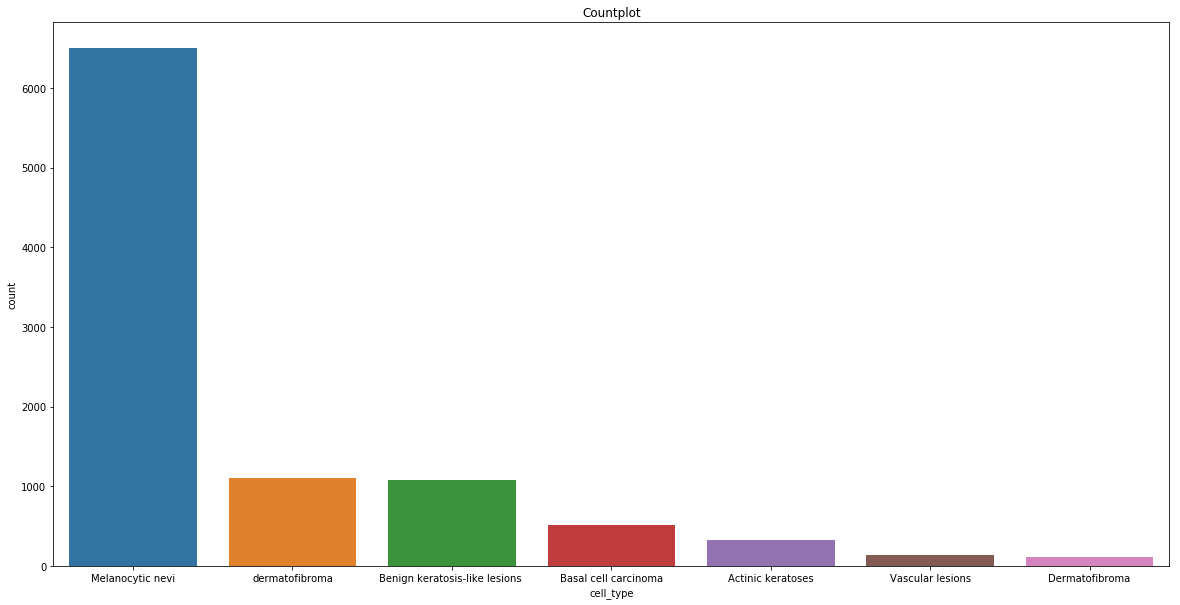

In [36]:
# countplot of cell type
plt.figure(figsize=(20, 10))

sns.countplot(x = 'cell_type',
              data = metadata_df,
              order = metadata_df['cell_type'].value_counts().index)
plt.title("Countplot")
plt.show()

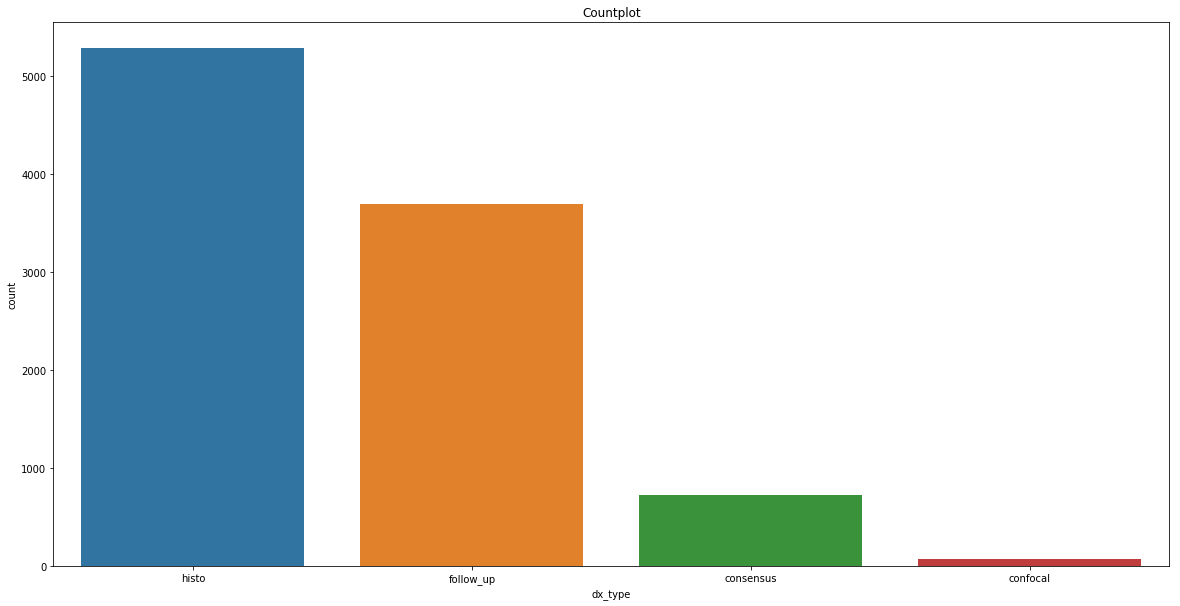

In [44]:
# countplot of diagnosis
plt.figure(figsize=(20, 10))

sns.countplot(x = 'dx_type',
              data = metadata_df,
              order = metadata_df['dx_type'].value_counts().index)
plt.title("Countplot")
plt.show()

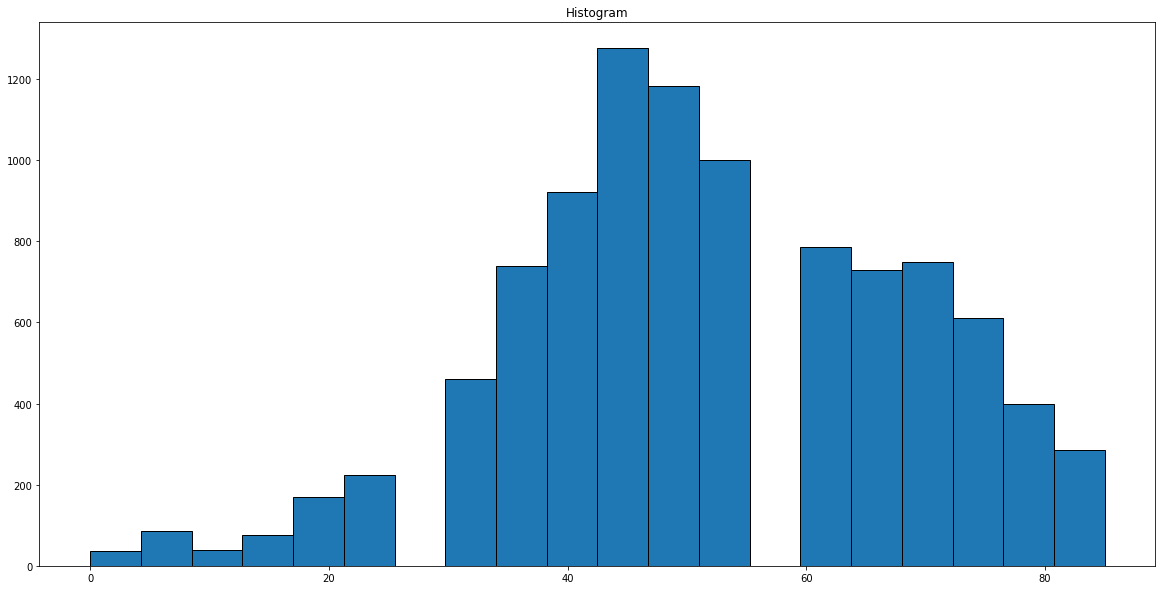

In [45]:
# histogram of age
plt.figure(figsize=(20, 10))

plt.hist(metadata_df['age'], bins = 20, histtype='bar', ec='black')
plt.title("Histogram")
plt.show()

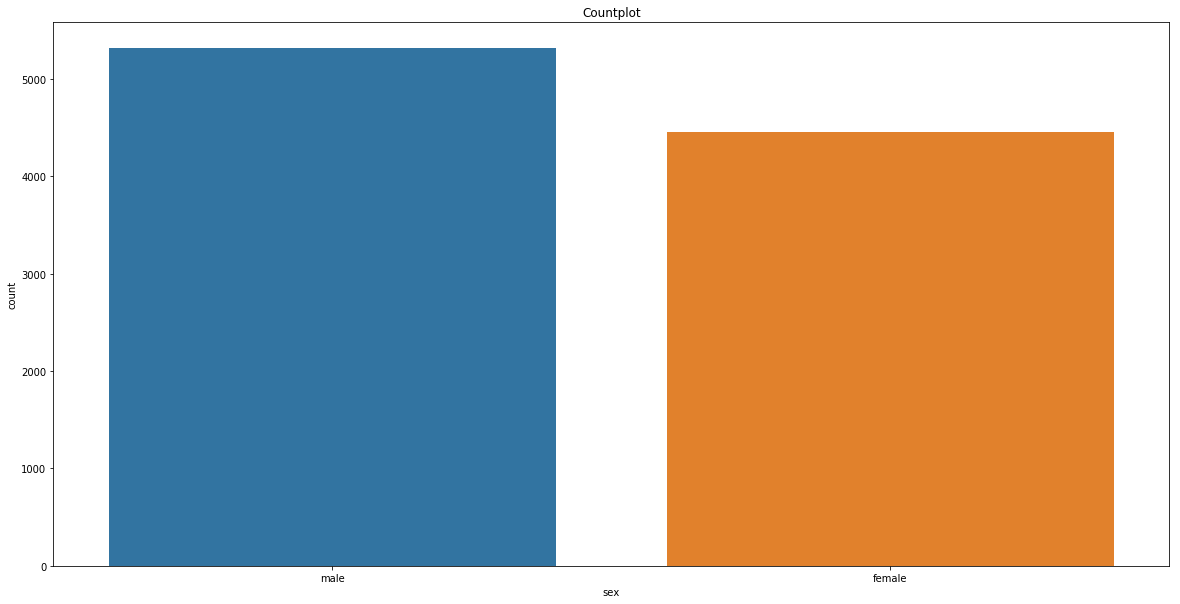

In [46]:
# countplot of sex
plt.figure(figsize=(20, 10))

sns.countplot(x = 'sex',
              data = metadata_df,
              order = metadata_df['sex'].value_counts().index)
plt.title("Countplot")
plt.show()

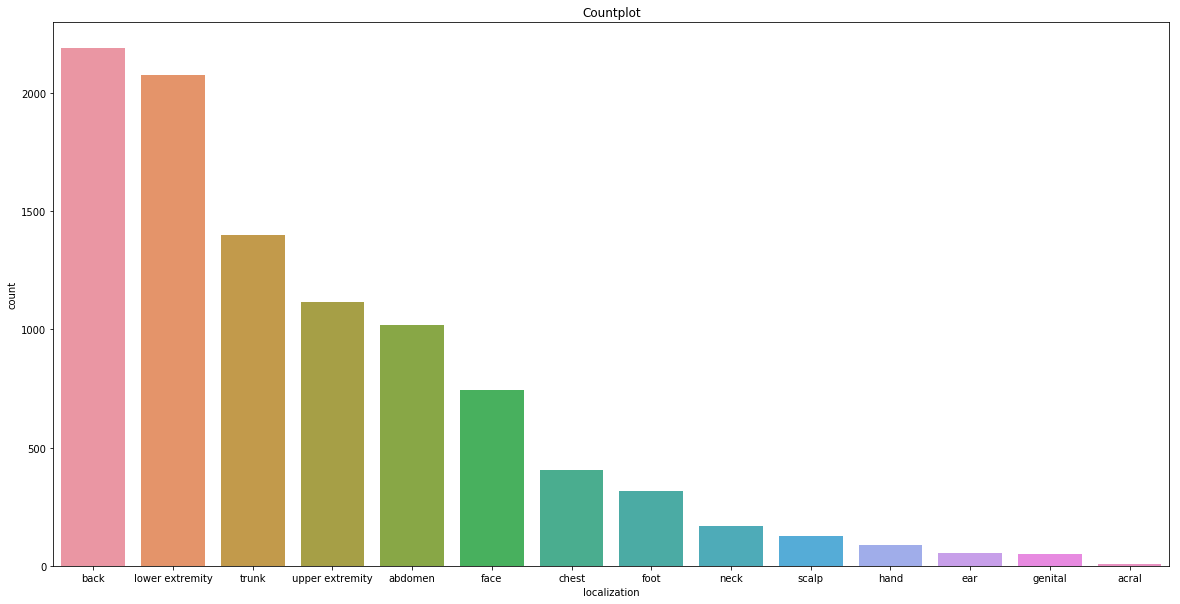

In [47]:
# countplot of loalization
plt.figure(figsize=(20, 10))

sns.countplot(x = 'localization',
              data = metadata_df,
              order = metadata_df['localization'].value_counts().index)
plt.title("Countplot")
plt.show()

In [52]:
# images rescaled to 12.5% of original size
metadata_df['image'] = metadata_df['path'].map(lambda x: np.asarray(Image.open(x).resize((75,50))))

In [67]:
# assign each cell type an ID and add it to a column
metadata_df['cell_type_id'] = pd.Categorical(metadata_df['cell_type']).codes

In [69]:
# get predictor variables and add them to a dataframe
predictor = metadata_df.drop(columns=['cell_type_id'],axis=1)
# get response variables and add them to a series
response = metadata_df['cell_type_id']

In [87]:
# create training and test data for x and y variables
x_train, x_test, y_train, y_test = train_test_split(predictor, response, test_size=0.25, random_state=1)

In [97]:
# normalise data
x_train = np.asarray(x_train["image"].tolist())
x_test = np.asarray(x_test['image'].tolist())

x_train = (x_train - np.mean(x_train)) / (np.std(x_train))
x_test = (x_test - np.mean(x_test) / np.std(x_test))